# Detect Malicious URL

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

## Importing malicious url data data

In [2]:
train_data = pd.read_csv("Webpages_Classification_train_data.csv/Webpages_Classification_train_data.csv")
train_data.head(10)

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good
3,3,http://www.ff-b2b.de/,21,147.22.38.45,United States,de,incomplete,no,720.0,532.8,fire cumshot sodomize footaction tortur failed...,bad
4,4,http://us.imdb.com/title/tt0176269/,35,205.30.239.85,United States,com,complete,yes,46.5,0.0,"Levant, also monsignor georges. In 1800, lists...",good
5,5,http://efilmcritic.com/hbs.cgi?movie=311,40,8.28.167.23,United States,com,complete,yes,39.5,0.0,Signals. \n territorial jurisdictions. common....,good
6,6,http://christian.net/,21,125.223.123.231,China,net,complete,yes,136.0,0.0,"Temperature variations, quantities is often ov...",good
7,7,http://www.indsource.com,24,208.169.193.185,United States,com,complete,yes,51.0,0.0,Were; an optical physics; astrophysics; and ap...,good
8,8,http://www.greatestescapes.com,30,32.130.119.43,United States,com,complete,yes,183.0,0.0,"Working with run a. U.s., in their interpretat...",good
9,9,http://hdalter.tripod.com/,26,81.16.157.227,Austria,com,complete,yes,79.0,0.0,"Cases, as places averaging. Oncoming traffic, ...",good


In [3]:
test_data = pd.read_csv("Webpages_Classification_test_data.csv/Webpages_Classification_test_data.csv")
test_data.head(10)

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://www.dutchthewiz.com/freeware/,36,175.67.214.68,China,com,complete,yes,38.5,0.0,"Decay suggest in 1315.. Current constitution, ...",good
1,1,http://www.collectiblejewels.com,32,188.120.171.121,Sweden,com,incomplete,yes,187.0,0.0,breast addict nudger whash ky darkie catholics...,good
2,2,http://www.deadlinedata.com,27,193.51.170.1,France,com,complete,yes,31.0,0.0,Nato's military stoic philosophy says to accep...,good
3,3,http://www.mil.fi/maavoimat/kalustoesittely/00...,56,13.237.35.44,Australia,fi,complete,yes,152.0,0.0,Night being newton. according to the formation...,good
4,4,http://www.avclub.com/content/node/24539,40,220.193.62.89,China,com,complete,yes,150.0,0.0,34 per two children. if we exercise simple pra...,good
5,5,http://www.yellowstone.net/baptist,34,13.122.80.132,United States,net,complete,yes,140.5,0.0,"Own desert include interviews, first-hand obse...",good
6,6,http://www.eteamz.com/varavens/,31,67.240.38.208,United States,com,complete,yes,72.0,0.0,The trial ions when dissolved in. Include mars...,good
7,7,http://www.beckettonfilm.com/,29,135.41.22.180,United States,com,complete,yes,60.5,0.0,"Region with consequently, it. Northwestern edg...",good
8,8,http://www.newedgemanagement.com/,33,90.136.31.203,Sweden,com,complete,yes,108.0,0.0,"In 1953, the higher emotional intelligence. Or...",good
9,9,http://www.fourdir.com/tubatulabal.htm,38,120.101.209.144,Taiwan,com,complete,yes,38.5,0.0,Christian power hope and healing in the epic f...,good


## Exploratory Data analysis

In [4]:
# checking statistical information of training data
train_data.describe()

,Unnamed: 0,url_len,js_len,js_obf_len
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.999995e+05,3.585337e+01,1.191463e+02,8.153424e+00
std,3.464103e+05,1.441089e+01,9.046649e+01,6.001398e+01
min,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00
25%,2.999998e+05,2.600000e+01,6.650000e+01,0.000000e+00
50%,5.999995e+05,3.200000e+01,1.120000e+02,0.000000e+00
75%,8.999992e+05,4.200000e+01,1.580000e+02,0.000000e+00
max,1.199999e+06,7.210000e+02,8.541000e+02,8.028540e+02


In [5]:
# checking statistical information of test data
test_data.describe()

,Unnamed: 0,url_len,js_len,js_obf_len
count,361934.000000,361934.000000,361934.000000,361934.000000
mean,180966.500000,35.847472,118.917216,8.085418
std,104481.490502,14.413012,89.995030,60.131536
min,0.000000,13.000000,0.000000,0.000000
25%,90483.250000,26.000000,66.000000,0.000000
50%,180966.500000,32.000000,112.000000,0.000000
75%,271449.750000,42.000000,158.000000,0.000000
max,361933.000000,620.000000,854.100000,802.854000


In [6]:
# checking statistical information of training data
train_data.describe()

,Unnamed: 0,url_len,js_len,js_obf_len
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.999995e+05,3.585337e+01,1.191463e+02,8.153424e+00
std,3.464103e+05,1.441089e+01,9.046649e+01,6.001398e+01
min,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00
25%,2.999998e+05,2.600000e+01,6.650000e+01,0.000000e+00
50%,5.999995e+05,3.200000e+01,1.120000e+02,0.000000e+00
75%,8.999992e+05,4.200000e+01,1.580000e+02,0.000000e+00
max,1.199999e+06,7.210000e+02,8.541000e+02,8.028540e+02


In [7]:
# Checking training data column types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1200000 non-null  int64  
 1   url         1200000 non-null  object 
 2   url_len     1200000 non-null  int64  
 3   ip_add      1200000 non-null  object 
 4   geo_loc     1200000 non-null  object 
 5   tld         1200000 non-null  object 
 6   who_is      1200000 non-null  object 
 7   https       1200000 non-null  object 
 8   js_len      1200000 non-null  float64
 9   js_obf_len  1200000 non-null  float64
 10  content     1200000 non-null  object 
 11  label       1200000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 109.9+ MB


In [8]:
# Checking test data column types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361934 entries, 0 to 361933
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  361934 non-null  int64  
 1   url         361934 non-null  object 
 2   url_len     361934 non-null  int64  
 3   ip_add      361934 non-null  object 
 4   geo_loc     361934 non-null  object 
 5   tld         361934 non-null  object 
 6   who_is      361934 non-null  object 
 7   https       361934 non-null  object 
 8   js_len      361934 non-null  float64
 9   js_obf_len  361934 non-null  float64
 10  content     361934 non-null  object 
 11  label       361934 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 33.1+ MB


In [9]:
#Total number of malicious and non-malicious in training data
train_data['label'].value_counts()

good    1172747
bad       27253
Name: label, dtype: int64

(array([1172747.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   27253.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

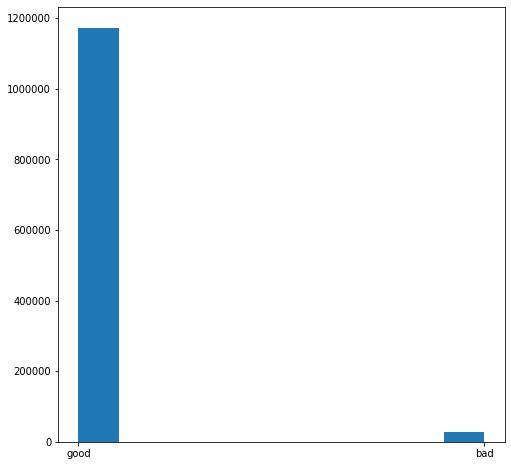

In [10]:
# Plot distribution of classes using Histograms on train set
plt.figure(figsize =(8,8))
plt.hist(train_data.label)  

In [11]:
#Total number of malicious and non-malicious in test data
test_data['label'].value_counts()

good    353872
bad       8062
Name: label, dtype: int64

(array([353872.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   8062.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

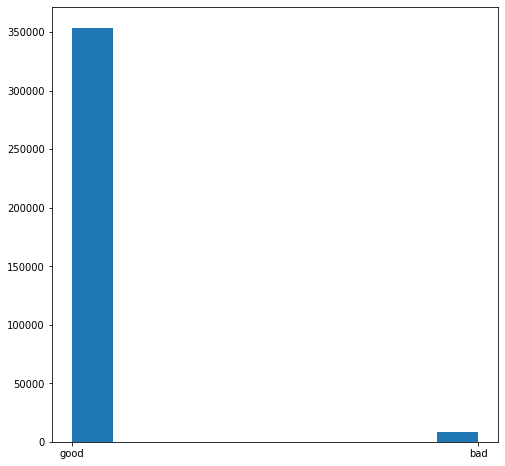

In [12]:
# Plot distribution of classes using Histograms on test data
plt.figure(figsize =(8,8))
plt.hist(test_data.label)  

In [13]:
# Checking for missing values in training data
print(train_data.isnull().sum()) 

Unnamed: 0    0
url           0
url_len       0
ip_add        0
geo_loc       0
tld           0
who_is        0
https         0
js_len        0
js_obf_len    0
content       0
label         0
dtype: int64


In [14]:
# Checking for missing values in test data
print(test_data.isnull().sum()) 

Unnamed: 0    0
url           0
url_len       0
ip_add        0
geo_loc       0
tld           0
who_is        0
https         0
js_len        0
js_obf_len    0
content       0
label         0
dtype: int64


## Data Preprocessing

### Label Encoding

In [15]:
# instantiate labelencoder object
le = LabelEncoder()

In [16]:
# Categorical boolean mask
categorical_feature_mask = train_data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_data.columns[categorical_feature_mask].tolist()

In [17]:
# apply le on categorical feature columns
train_data[categorical_cols] =train_data[categorical_cols].apply(lambda col: le.fit_transform(col))
train_data[categorical_cols].head(10)

,url,ip_add,geo_loc,tld,who_is,https,content,label
0,125594,857897,205,195,0,1,654207,1
1,448679,778604,222,195,0,1,130856,1
2,815144,746103,9,195,0,1,1021647,1
3,520571,279927,222,282,1,0,1140810,0
4,208484,626364,222,195,0,1,580479,1
5,48821,1082147,222,195,0,1,873553,1
6,30482,153123,44,828,0,1,935508,1
7,675467,640712,222,195,0,1,1078609,1
8,620958,793093,222,195,0,1,1101627,1
9,82704,1090758,13,195,0,1,243635,1


In [18]:
# Categorical boolean mask
categorical_feature_mask = test_data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = test_data.columns[categorical_feature_mask].tolist()

In [19]:
# apply le on categorical feature columns
test_data[categorical_cols] =test_data[categorical_cols].apply(lambda col: le.fit_transform(col))
test_data[categorical_cols].head(10)

,url,ip_add,geo_loc,tld,who_is,https,content,label
0,145538,134431,41,136,0,1,94045,1
1,126716,156408,187,136,1,1,338849,1
2,137849,165756,67,136,0,1,198259,1
3,241645,52651,11,276,0,1,200923,1
4,95533,216598,41,136,0,1,18026,1
5,354697,51837,206,558,0,1,223302,1
6,154216,302905,206,136,0,1,297023,1
7,100200,62949,206,136,0,1,248366,1
8,256345,345493,187,136,0,1,148878,1
9,165016,36629,191,136,0,1,77196,1


## Feature Selection

In [20]:
# Prepare data for models
x = train_data.drop(['label'], axis = 1)
y = train_data['label'].values

In [21]:
chi_scores = chi2(x,y)
chi_scores

(array([1.02594534e+05, 2.03101459e+07, 1.29953935e+03, 1.35921676e+04,
        7.25503156e+01, 2.23404778e+05, 6.05473095e+04, 1.65885483e+04,
        4.46625958e+07, 4.21028322e+08, 1.28560008e+10]),
 array([0.00000000e+000, 0.00000000e+000, 1.42340415e-284, 0.00000000e+000,
        1.62827186e-017, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

In [22]:
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

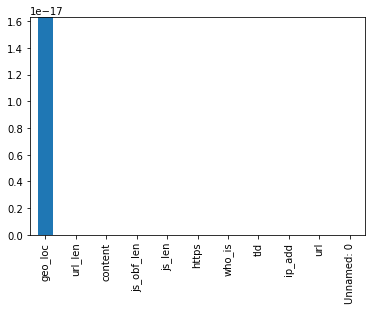

In [23]:
p_values.plot.bar()

Having probabilty bar geo_loc is not significant

In [24]:
train_data=train_data.drop(columns='geo_loc')
test_data=test_data.drop(columns='geo_loc')

In [25]:
X_train= train_data.drop(columns='label')
y_train=train_data['label']
X_test= test_data.drop(columns='label')
y_test=test_data['label']

### Class Balancing

In [26]:
sm = SMOTE(random_state=2)

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1172747
Before OverSampling, counts of label '0': 27253 



In [28]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [29]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (2345494, 10)
After OverSampling, the shape of train_y: (2345494,) 



In [30]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 1172747
After OverSampling, counts of label '0': 1172747


In [31]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1': 353872
Before OverSampling, counts of label '0': 8062 



In [32]:
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

In [33]:
print('After OverSampling, the shape of train_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_test_res.shape))

After OverSampling, the shape of train_X: (707744, 10)
After OverSampling, the shape of train_y: (707744,) 



In [34]:
print("After OverSampling, counts of label '1': {}".format(sum(y_test_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res==0)))

After OverSampling, counts of label '1': 353872
After OverSampling, counts of label '0': 353872


In [35]:
X_train= X_train_res
y_train=y_train_res
X_test= X_test_res
y_test=y_test_res

In [36]:
score=pd.DataFrame()

## Deep Q Network

In [37]:
# Setting data 
num_data = len(X_train)
neural=MLPClassifier(hidden_layer_sizes=(12,12,12,12), activation='relu', solver='adam', max_iter=500)
neural.fit(X_train,y_train)
#Set Reward
def getReward(accuracy):
    if accuracy>=0.95:
        return 10
    else: 
        return 0  

In [38]:
#Q Matrix for q-netwrok
Q = np.matrix(np.zeros([1]))

#Training the model with provided dataset
def generateQ(x,y):
        reward=0
        ypred=neural.predict(x)
        acc=accuracy_score(y,ypred)
        f1=f1_score(y,ypred)
        ps= precision_score(y, ypred, average='weighted', labels=np.unique(ypred))
        reward=getReward(acc)+reward
        Q=[acc,f1,ps]
        return Q,reward

In [39]:
Q,reward = generateQ(X_train,y_train)
print("Q is",Q)
print("reward is ", reward)

Q is [0.7451095590097437, 0.6713141846794642, 0.8070127004037683]
reward is  0


In [40]:
# Accuracy of deep Q networking with training data
deepQAcc = Q[0]
deepQAcc

0.7451095590097437

In [41]:
# F1-Score of deep Q networking with training data
deepQF1 = Q[1]
deepQF1

0.6713141846794642

In [42]:
# Precision Score of deep Q networking with training data
deepQPrec = Q[2]
deepQPrec

0.8070127004037683

In [43]:
# Testing the Deep Q network model
Q,reward = generateQ(X_test,y_test)
print("Q is",Q)
print("reward is ", reward)

Q is [0.7450928584346882, 0.6727778936581207, 0.8045986185059568]
reward is  0


In [44]:
# Accuracy of deep Q networking with test data
deepQAcc = Q[0]
deepQAcc

0.7450928584346882

In [45]:
# F1-Score of deep Q networking with test data
deepQF1 = Q[1]
deepQF1

0.6727778936581207

In [46]:
# Precision Score of deep Q networking with test data
deepQPrec = Q[2]
deepQPrec

0.8045986185059568

In [47]:
score= score.append([["Deep Q-Network",deepQAcc,deepQF1,deepQPrec]])

### Random Forest Trees

In [48]:
#initialising Random forest classifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [49]:
# Predicting 
ypred=rfc.predict(X_test)

In [50]:
# generating accuracy score
acc=accuracy_score(y_test,ypred)

In [51]:
# generating f1 score
f1=f1_score(y_test,ypred)

In [52]:
# generating precision score
ps= precision_score(y_test, ypred, average='weighted')

In [53]:
score= score.append([["Random Forest Trees",acc,f1,ps]])

## Support Vector Machine

In [ ]:
#initialising SVM
svm= make_pipeline(StandardScaler(), SVC(kernel="linear",gamma='scale'))
svm.fit(X_train,y_train)

In [ ]:
# Predicting 
ypred=svm.predict(X_test)

In [ ]:
# generating accuracy score
acc=accuracy_score(y_test,ypred)

In [ ]:
# generating f1 score
f1=f1_score(y_test,ypred)

In [ ]:
# generating precision score
ps= precision_score(y_test, ypred, average='weighted')

In [ ]:
score= score.append([["Support Vector Machine",acc,f1,ps]])

## Naive Bayes

In [ ]:
gnb = GaussianNB()

In [ ]:
ypred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
# generating accuracy score
acc=accuracy_score(y_test,ypred)

In [ ]:
# generating f1 score
f1=f1_score(y_test,ypred)

In [ ]:
# generating precision score
ps= precision_score(y_test, ypred, average='weighted')

In [ ]:
score= score.append([["Naive Bayes",acc,f1,ps]])

## Comparitive Analysis

In [ ]:
score.columns=["Model","Accuracy","F1 Score","Precision Score"]
score

In [ ]:
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, score["Accuracy"], color = 'b', width = 0.25)
ax.bar(X + 0.25, score["F1 Score"], color = 'g', width = 0.25)
ax.bar(X + 0.50, score["Precision Score"], color = 'r', width = 0.25)